In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("ObesityDataSetOriginal.csv")

In [3]:
df = df.drop('Weight' , axis=1)
df = df.drop('Height' , axis=1)

In [4]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [5]:
X = df.drop('NObeyesdad', axis=1) 
y = df['NObeyesdad']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=4)  
svm = SVC(kernel='rbf', probability=True, C=1.0)

ensemble_model = VotingClassifier(estimators=[
    ('Random Forest', rf),
    ('KNN', knn),
    ('SVM', svm)
], voting='soft', weights=[4, 1, 1]) 

ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('KNN', KNeighborsClassifier(n_neighbors=4)),
                             ('SVM', SVC(probability=True))],
                 voting='soft', weights=[4, 1, 1])

In [9]:
y_pred = ensemble_model.predict(X_test)

In [10]:
print("Accuracy: {:.8f}".format(accuracy_score(y_test, y_pred)))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.84633570
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91        65
           1       0.64      0.73      0.68        52
           2       0.79      0.78      0.79        59
           3       0.90      0.98      0.94        64
           4       0.99      0.99      0.99        75
           5       0.85      0.74      0.79        53
           6       0.75      0.73      0.74        55

    accuracy                           0.85       423
   macro avg       0.84      0.83      0.83       423
weighted avg       0.85      0.85      0.85       423

Confusion Matrix:
 [[58  7  0  0  0  0  0]
 [ 3 38  3  0  0  4  4]
 [ 0  4 46  3  0  1  5]
 [ 0  1  0 63  0  0  0]
 [ 0  1  0  0 74  0  0]
 [ 1  5  4  0  0 39  4]
 [ 0  3  5  4  1  2 40]]


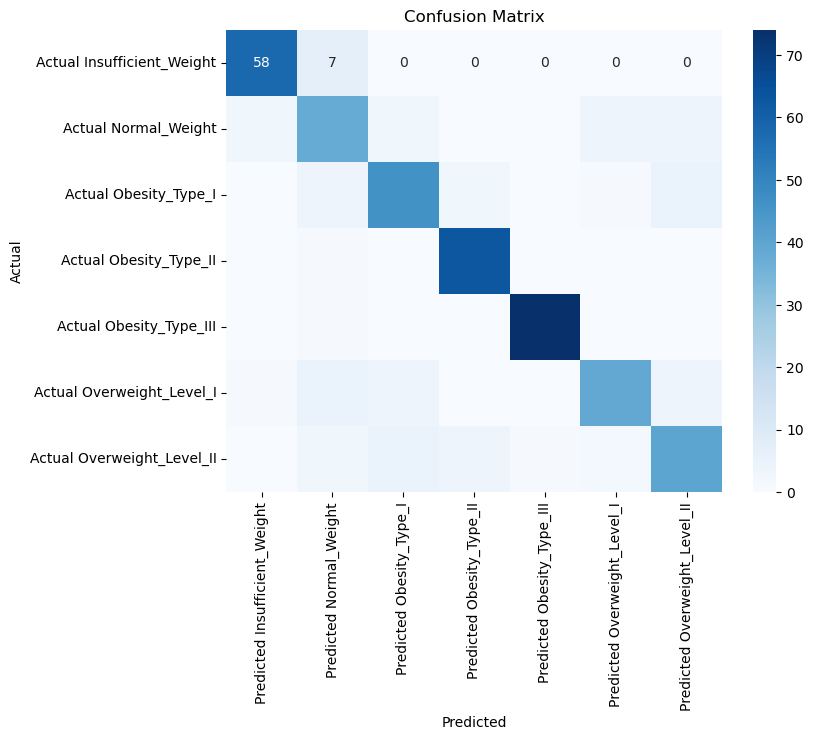

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Insufficient_Weight', 'Predicted Normal_Weight', 'Predicted Obesity_Type_I', 'Predicted Obesity_Type_II', 'Predicted Obesity_Type_III', 'Predicted Overweight_Level_I', 'Predicted Overweight_Level_II'], yticklabels=['Actual Insufficient_Weight', 'Actual Normal_Weight', 'Actual Obesity_Type_I', 'Actual Obesity_Type_II', 'Actual Obesity_Type_III', 'Actual Overweight_Level_I', 'Actual Overweight_Level_II'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()